# Keras tuner

Keras tuner and hyperparameters search. Maybe some architecture search as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kerastuner as kt

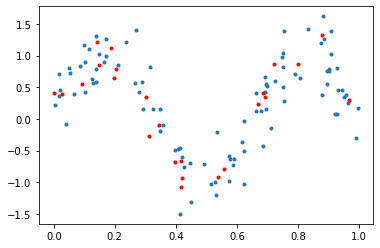

In [11]:
# Cook some simplistic data:
np.random.seed(1)
n_points = 120
x = np.random.uniform(size=n_points)
y = np.sin(x*3*np.pi) + np.random.normal(size=x.shape)/3

ind = list(range(np.round(n_points*0.2).astype(int)))
xtest = x[ind]
ytest = y[ind]
x = x[[i for i in range(n_points) if i not in ind ]]
y = y[[i for i in range(n_points) if i not in ind ]]

plt.plot(x,y,'.');
plt.plot(xtest, ytest, 'r.');

In [18]:
# Custom callback, to see what's happening during the training
# https://www.tensorflow.org/guide/keras/custom_callback

class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            print(f"{logs['loss']:0.3}", end=' ')

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), # https://www.tensorflow.org/api_docs/python/tf/keras/Input
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


0.564 0.395 0.247 0.211 0.213 0.203 0.213 0.2 0.193 0.194 0.192 0.185 0.178 0.175 0.177 0.169 0.158 0.155 0.159 0.147 0.14 0.139 0.132 0.136 0.125 

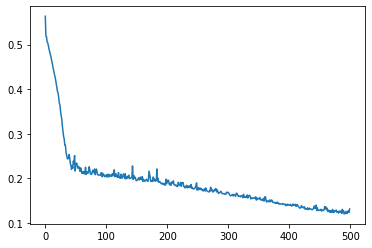

In [14]:
history = model.fit(x, y,
                    batch_size=16,
                    epochs=500,
                    verbose=0,
                    callbacks=[CustomCallbacks()]
                    #, validation_data=(x, y)
                   )

plt.plot(history.history['loss']);

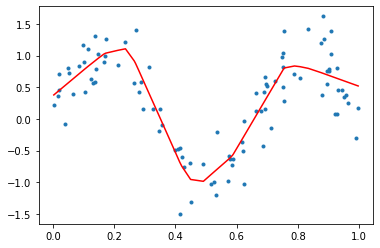

In [17]:
y_new = model.predict(x)
plt.plot(x,y, '.');
ind = np.argsort(x)
plt.plot(x[ind], y_new[ind], 'r-');